In [8]:
import matplotlib.pyplot as plt #image demonstraiton
from matplotlib import image as img_reader #image reading 
from PIL import Image as img_saver #image saving

import numpy as np

In [9]:
def ploting_images( src , title) :
    image = img_reader.imread(src) #image reading
    plt.imshow(image)
    plt.title(title)
    plt.show()
    type(image)

In [5]:
def saving_images(image , src) :
     img_saver.fromarray(img_gray).convert('L').save(src)

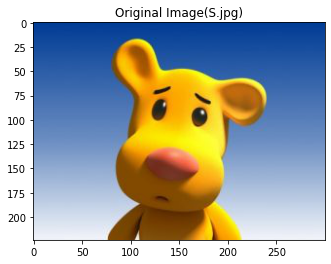

In [11]:
ploting_images(  
    src = "s.jpg",
    title = "Original Image(S.jpg)"
)

In [43]:
import random

#this function will randomly generate the dither matrix
def dither_random_matrix_generator(n):
    used_numbers = np.arange(0,(n**2)) * 0
    added_numbers_count = 0
    matrixLen = (n**2)-1
    while True:

        if added_numbers_count != matrixLen :
            
            random_number=random.randint(0,matrixLen) 
            #unrepeated one is acceptable
            if not random_number in used_numbers: 
                #unrepeated random number placing in dithering matrix
                used_numbers[added_numbers_count] = random_number
                added_numbers_count -=-1
        else : break
    
    matrix = used_numbers.reshape(n,n)
    return matrix

In [45]:
#order dithering dimention is 4 in this problem
orderd_dither_matrix = dither_random_matrix_generator(4)
orderd_dither_matrix

array([[43, 48, 56, 14, 60, 41, 16, 53],
       [46, 25, 20, 36, 59, 58,  3, 49],
       [32, 22,  8, 42, 21, 54, 44, 63],
       [24, 28, 62, 30, 17, 15, 52, 27],
       [33, 38, 10, 19,  7,  1, 35, 47],
       [34, 55, 12, 57, 51, 40, 37, 26],
       [ 6, 29, 11, 45, 61, 50, 39,  5],
       [31,  2, 23,  9, 18,  4, 13,  0]])

In [ ]:
def image_gray_scale(source):
    image = img_reader.imread(source) #image reading
    